In [414]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from collections import Counter
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1.05, random_state=111)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(160, 2) (160,) (40, 2) (40,)


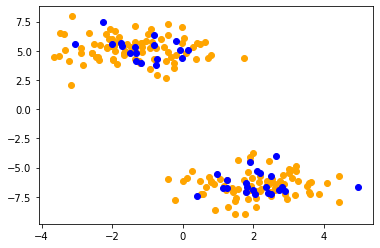

In [415]:
X_2 = [np.amin(X_train[:, 0]), np.amax(X_train[:, 0])]
plt.scatter(X_train[:, 0], X_train[:, 1], color='orange')
plt.scatter(X_test[:, 0], X_test[:, 1], color='blue')

In [416]:
class KNN:
    def __init__(self, K=3):
        self.K = K

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes = np.unique(y_train).astype(np.int)
    
    def predict(self, X):
        counts = []
        for x in X:
            distances = self._euclidean_distance(x, X_train)
            distances_sorted = np.argsort(distances)[: self.K]
            labels = np.array([self.y_train[i] for i in distances_sorted])
            counts.append([labels[labels == i].shape[0] for i in self.classes])
        return np.argmax(counts, axis=1)

    def _euclidean_distance(self, x1, X2):
        distances = np.sqrt(np.sum((x1 - X2) ** 2, axis=1))
        return distances



In [417]:
def accuracy(y, preds):
    return np.mean(y == preds)*100

In [418]:
KNN_Classifier = KNN()
KNN_Classifier.fit(X_train, y_train)
preds = KNN_Classifier.predict(X_test)
accuracy(y_test, preds)

100.0